In [1]:
import numpy as np
import pandas as pd

In [6]:
taxi_df=pd.read_csv(r"C:\Users\pranav\Downloads\TaxiFare.csv", 
                   header=0,index_col=0)
taxi_df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 26:21.0 to 13:14.0
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 3.1+ MB


In [8]:
taxi_df.date_time_of_pickup=pd.to_datetime(taxi_df.date_time_of_pickup)

In [11]:
taxi_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [17]:
# extract various date time components as seperate variables
taxi_df = taxi_df.assign(hour = taxi_df.date_time_of_pickup.dt.hour, 
                         day = taxi_df.date_time_of_pickup.dt.day,
                        month = taxi_df.date_time_of_pickup.dt.month, 
                        year = taxi_df.date_time_of_pickup.dt.year, 
                        dayofweek = taxi_df.date_time_of_pickup.dt.dayofweek)

In [18]:
taxi_df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
unique_id,,,,,,,,,,,,
26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [19]:
taxi_df.drop("date_time_of_pickup",axis=1,inplace=True)

In [21]:
from haversine import haversine, Unit
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)
taxi_df['travel_dist_km']=taxi_df.apply(lambda row: haversine((row["latitude_of_pickup"],row["longitude_of_pickup"]),(row["latitude_of_dropoff"],row["longitude_of_dropoff"])),axis=1)

In [22]:
taxi_df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
unique_id,,,,,,,,,,,,
26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030765
52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450145
35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389527
30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799274
51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999160


In [24]:
taxi_df.drop(["latitude_of_pickup","longitude_of_pickup","latitude_of_dropoff","longitude_of_dropoff"],axis=1,inplace=True)

In [25]:
taxi_df.head()

,amount,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
unique_id,,,,,,,,
26:21.0,4.5,1,17,15,6,2009,0,1.030765
52:16.0,16.9,1,16,5,1,2010,1,8.450145
35:00.0,5.7,2,0,18,8,2011,3,1.389527
30:42.0,7.7,1,4,21,4,2012,5,2.799274
51:00.0,5.3,1,7,9,3,2010,1,1.999160


In [26]:
X=taxi_df.values[:,1:]
Y=taxi_df.values[:,0]

In [27]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

In [28]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


In [33]:
#predicting using the DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(max_depth=5,min_samples_leaf=5,random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[48.09932806  5.45887866  7.26304472 ...  7.26304472  5.45887866
 11.34524622]


In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7200176360149446
RMSE: 5.107133479423072
Adj R-square: 0.7199784322113781


In [35]:
print(list(zip(taxi_df.columns[1:],model_DecisionTree.feature_importances_)))

[('no_of_passenger', 0.0), ('hour', 0.0008234626407580518), ('day', 0.0), ('month', 0.0), ('year', 0.02118909673249581), ('dayofweek', 0.0), ('travel_dist_km', 0.9779874406267461)]


In [36]:
from sklearn import tree
with open("model_DecisionTree.txt", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=taxi_df.columns[1:],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [37]:
#predicting using the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_DecisionTree=RandomForestRegressor(n_estimators=100,random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[48.2679  6.9413  6.785  ...  5.682   4.766  14.78  ]


In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7142345506029277
RMSE: 5.1596082695079755
Adj R-square: 0.7141945370378417


In [40]:
#predicting using the KNeighbors_Regressor
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(Y_train))), metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.014235495397936115
RMSE: 9.582933151913974
Adj R-square: 0.01409746628263342


In [42]:
#predicting using the KNeighbors_Regressor
from sklearn.svm import SVR
model_SVR=SVR(kernel="rbf",gamma=0.1,C=1)
#fit the model on the data and predict the values
model_SVR.fit(X_train,Y_train)
Y_pred=model_SVR.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: -0.04159876243487193
RMSE: 9.850586709582258
Adj R-square: -0.041744609597158755


<Figure size 2160x1080 with 0 Axes>

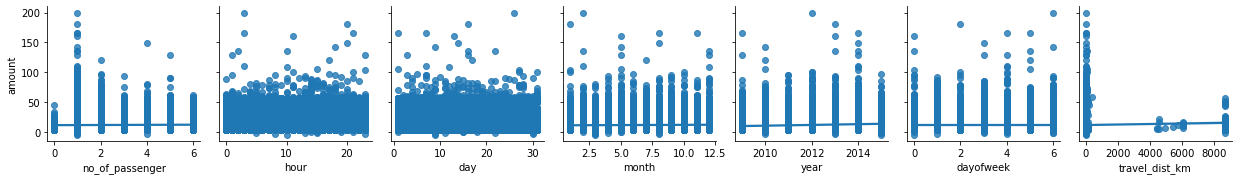

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
#Assumption 2:Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
plt.figure(figsize=(30,15))
sns.pairplot(taxi_df,x_vars=taxi_df.columns[1:],y_vars="amount",
             kind='reg')
plt.show()


In [45]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

11.400942258204859
[ 0.14968709 -0.21478066 -0.03756448  0.40106422  1.19962753 -0.0329417
  0.13588039]
[ 9.05339049 11.72364705 10.56354216 ...  9.75624039 10.68918898
 12.56919464]


In [46]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.017943823527378888
RMSE: 9.564891244043723
Adj R-square: 0.017806313661094086
